<a href="https://colab.research.google.com/github/sudishaG/Clustering/blob/main/Kmeans_USArrests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing all python packages, system-level packages and importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
!pip install ISLP
from ISLP import load_data
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree)
from ISLP.cluster import compute_linkage

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━

In [ ]:
#Loads the USArrests dataset from R's built-in datasets into a Pandas DataFrame.
df = get_rdataset('USArrests').data

#Prints the DataFrame.
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
#Prints the column names of the USArrests DataFrame.
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
#Prints the column number of the USArrests DataFrame.
print(len(df.columns))

4


In [ ]:
#Prints the row number of the USArrests DataFrame.
num_rows=len(df)
print(num_rows)

50


In [ ]:
#Calculates and prints the mean for each column (variable).
df.mean()

,0
Murder,7.788
Assault,170.760
UrbanPop,65.540
Rape,21.232


In [ ]:
import seaborn as sns

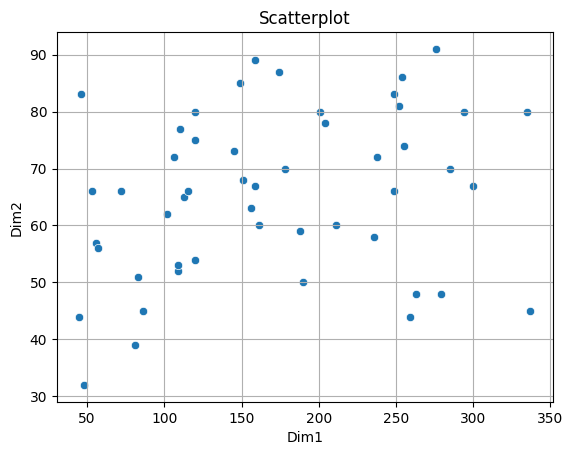

In [57]:
sns.scatterplot(df,x='Assault',y='UrbanPop')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Scatterplot')
plt.grid(True)
plt.show()

In [ ]:
#Creates an object that can perform the necessary data preprocessing (standardization) for PCA.
scaler = StandardScaler(with_std=True,with_mean=True)

#Scales the data using the above object scaler.
df_scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

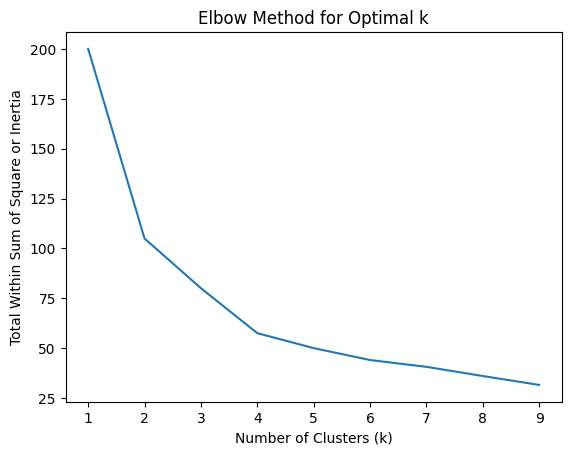

In [ ]:
 # Example for Elbow Method (requires matplotlib)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within Sum of Square or Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Example: Assuming k=4 is chosen based on Elbow Method
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
#Clustering for k=4
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans_model.fit_predict(df_scaled)

In [ ]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

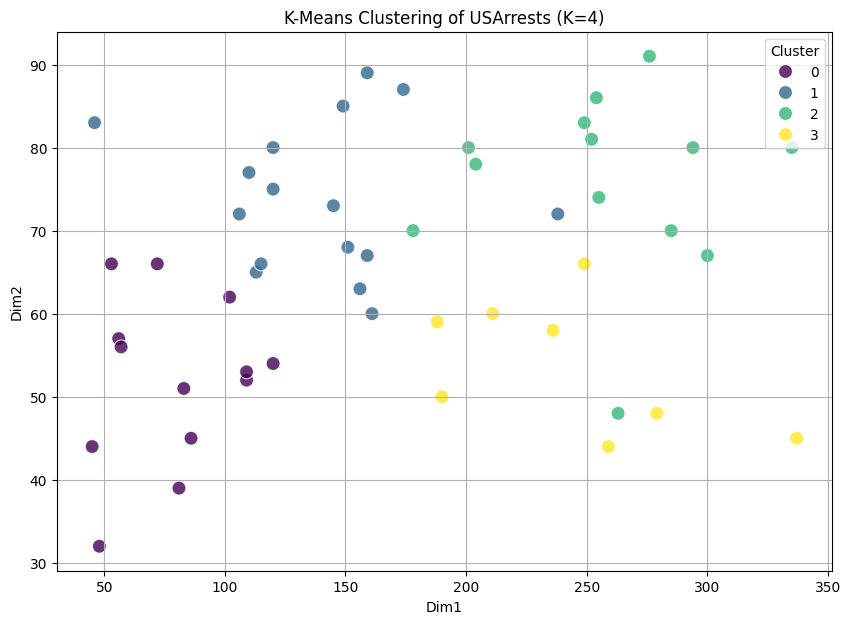

In [58]:
# Visualize the clusters (example using two features)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Assault', y='UrbanPop', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Means Clustering of USArrests (K={optimal_k})')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.grid(True)
plt.show()